### Data Preprocessing

In [2]:
import os
import random
import requests
import numpy as np
import pandas as pd
from tqdm import tqdm
from time import sleep,mktime
from datetime import datetime,time,date,timedelta

def get_full_historical_ps_data():
    ### 读取本地的Fireant历史分钟数据
    df1 = pd.read_csv('VN30F1M.csv')
    ### 将Fireant上的数据转化成越南本地时间，使用简单的方法计算，即加上7小时
    df1['Date'] = pd.to_datetime(df1['Date'].apply(lambda x:x.split('+')[0])) + pd.Timedelta(hours=7)
    ### 从entrade上提取数据，设定好开始日期，结束日期
    today_date = int(mktime(pd.Timestamp('2017-01-01').timetuple()))
    end_date = int(mktime((date.today() + pd.Timedelta('1D')).timetuple()))
    ### 结合成url
    url = "https://services.entrade.com.vn/chart-api/chart?from={start_date}&resolution=1&symbol=VN30F1M&to={end_date}".format(start_date=today_date,end_date=end_date)
    headers = {
      'authority': 'services.entrade.com.vn',
      'accept': 'application/json, text/plain, */*',
      'accept-language': 'en-US,en;q=0.9',
      'dnt': '1',
      'origin': 'https://banggia.dnse.com.vn',
      'referer': 'https://banggia.dnse.com.vn/',
      'sec-ch-ua': '"Edge";v="114", "Chromium";v="114", "Not=A?Brand";v="24"',
      'sec-ch-ua-mobile': '?0',
      'sec-ch-ua-platform': '"Windows"',
      'sec-fetch-dest': 'empty',
      'sec-fetch-mode': 'cors',
      'sec-fetch-site': 'cross-site',
      'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36 Edg/114.0.1788.0'}
    ### 读取本地IP文件csv，并且将index设定好
    ip_port = pd.read_csv('ip_port.csv').iloc[:,1:]
    ip_port.index = range(len(ip_port))
    ### 随机选择第n行的ip信息
    random_integer = random.randint(0, len(ip_port)-1)
    ip_port = ip_port.loc[random_integer]
    proxies = {'http':str(ip_port['ip'])+':'+str(ip_port['port'])}
    ### 进行循环获取数据
    ### 设定初始值为0，若重复10此还无法获取数据，则终止
    i = 0
    loop = True
    while loop:
        i = i + 1
        try:
            ### 进行requests，并且在requests中加入proxies和timeout
            df = pd.DataFrame(requests.get(url=url,proxies=proxies,headers=headers,timeout=30).json())
            ### 设定columns名
            df.columns = ['Date','Open','High','Low','Close','Volume','nt']
            ### 修改Datatime的format
            df['Date'] = pd.to_datetime(df['Date'].astype(int).apply(lambda x: datetime.fromtimestamp(x)))
            ### 合并历史数据和最新数据
            df = pd.concat([df1,df])
            ### 优先使用entrade,并且删掉entrade的最后一个columns
            df = df.groupby('Date').head(1).drop('nt',axis=1)
            ### 计算Value和day
            df['Value'] = df['Close'] * df['Volume']
            df['day'] = df['Date'].dt.date
            ### 按照时间降序，并且只选择在time range中的数据
            df = df.sort_values(by='Date',ascending=True)
            df = df.loc[((df['Date'].dt.time>=time(9,0))&(df['Date'].dt.time<=time(13,0)))|((df['Date'].dt.time>=time(13,0))&(df['Date'].dt.time<=time(14,45)))]
            return df
        except:
            pass
        sleep(3)
        if i>=10:
            loop = False
def get_full_historical_index_data():
    ### 读取本地的Fireant历史分钟数据
    df1 = pd.read_csv('VN30.csv')
    ### 将Fireant上的数据转化成越南本地时间，使用简单的方法计算，即加上7小时
    df1['Date'] = pd.to_datetime(df1['Date'].apply(lambda x:x.split('+')[0])) + pd.Timedelta(hours=7)
    ### 从entrade上提取数据，设定好开始日期，结束日期
    today_date = int(mktime(pd.Timestamp('2017-01-01').timetuple()))
    end_date = int(mktime((date.today() + pd.Timedelta('1D')).timetuple()))
    ### 结合成url
    url = "https://services.entrade.com.vn/chart-api/v2/ohlcs/index?from={start_date}&to={end_date}&symbol=VN30&resolution=1".format(start_date=today_date,end_date=end_date)
    headers = {
      'authority': 'services.entrade.com.vn',
      'accept': 'application/json, text/plain, */*',
      'accept-language': 'en-US,en;q=0.9',
      'dnt': '1',
      'origin': 'https://banggia.dnse.com.vn',
      'referer': 'https://banggia.dnse.com.vn/',
      'sec-ch-ua': '"Edge";v="114", "Chromium";v="114", "Not=A?Brand";v="24"',
      'sec-ch-ua-mobile': '?0',
      'sec-ch-ua-platform': '"Windows"',
      'sec-fetch-dest': 'empty',
      'sec-fetch-mode': 'cors',
      'sec-fetch-site': 'cross-site',
      'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36 Edg/114.0.1788.0'}
    ### 读取本地IP文件csv，并且将index设定好
    ip_port = pd.read_csv('ip_port.csv').iloc[:,1:]
    ip_port.index = range(len(ip_port))
    ### 随机选择第n行的ip信息
    random_integer = random.randint(0, len(ip_port)-1)
    ip_port = ip_port.loc[random_integer]
    proxies = {'http':str(ip_port['ip'])+':'+str(ip_port['port'])}
    ### 进行循环获取数据
    ### 设定初始值为0，若重复10此还无法获取数据，则终止
    i = 0
    loop = True
    while loop:
        i = i + 1
        try:
            ### 进行requests，并且在requests中加入proxies和timeout
            df = pd.DataFrame(requests.get(url=url,proxies=proxies,headers=headers,timeout=30).json())
            ### 设定columns名
            df.columns = ['Date','Open','High','Low','Close','Volume','nt']
            ### 修改Datatime的format
            df['Date'] = pd.to_datetime(df['Date'].astype(int).apply(lambda x: datetime.fromtimestamp(x)))
            ### 合并历史数据和最新数据
            df = pd.concat([df1,df])
            ### 优先使用entrade,并且删掉entrade的最后一个columns
            df = df.groupby('Date').head(1).drop('nt',axis=1)
            ### 计算Value和day
            df['Value'] = df['Close'] * df['Volume']
            df['day'] = df['Date'].dt.date
            ### 按照时间降序，并且只选择在time range中的数据
            df = df.sort_values(by='Date',ascending=True)
            df = df.loc[((df['Date'].dt.time>=time(9,0))&(df['Date'].dt.time<=time(13,0)))|((df['Date'].dt.time>=time(13,0))&(df['Date'].dt.time<=time(14,45)))]
            return df
        except:
            pass
        sleep(3)
        if i>=10:
            loop = False


# Specify the path for the new folder
folder_path = os.getcwd().replace('\\','/') + "/vn30f1m_folder/"
# Check if the folder already exists
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

full_historical_ps_data = get_full_historical_ps_data()
full_historical_ps_data.to_pickle('vn30f1mdata.pickle')
full_historical_ps_data.to_pickle(folder_path+'{}.pickle'.format(str(date.today())))
vn30f1m = pd.read_pickle('vn30f1mdata.pickle')

# Specify the path for the new folder
folder_path = os.getcwd().replace('\\','/') + "/vn30_folder/"
# Check if the folder already exists
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

full_historical_index_data = get_full_historical_index_data()
full_historical_index_data.to_pickle('vn30data.pickle')
full_historical_index_data.to_pickle(folder_path+'{}.pickle'.format(str(date.today())))
vn30 = pd.read_pickle('vn30data.pickle')


def get_ps_1(days):
    ### 数据源 entrade
    
    ### 读取本地IP文件csv，并且将index设定好
    ip_port = pd.read_csv('ip_port.csv').iloc[:,1:]
    ip_port.index = range(len(ip_port))
    ### 随机选择第n行的ip信息
    random_integer = random.randint(0, len(ip_port)-1)
    ip_port = ip_port.loc[random_integer]
    proxies = {'http':str(ip_port['ip'])+':'+str(ip_port['port'])}
    
    today_date = int(mktime((date.today() - pd.Timedelta(str(days)+'D')).timetuple()))
    end_date = int(mktime((date.today() + pd.Timedelta('1D')).timetuple()))
    url = "https://services.entrade.com.vn/chart-api/chart?from={start_date}&resolution=1&symbol=VN30F1M&to={end_date}".format(start_date=today_date, end_date=end_date)
    headers = {
      'authority': 'services.entrade.com.vn',
      'accept': 'application/json, text/plain, */*',
      'accept-language': 'en-US,en;q=0.9',
      'dnt': '1',
      'origin': 'https://banggia.dnse.com.vn',
      'referer': 'https://banggia.dnse.com.vn/',
      'sec-ch-ua': '"Edge";v="114", "Chromium";v="114", "Not=A?Brand";v="24"',
      'sec-ch-ua-mobile': '?0',
      'sec-ch-ua-platform': '"Windows"',
      'sec-fetch-dest': 'empty',
      'sec-fetch-mode': 'cors',
      'sec-fetch-site': 'cross-site',
      'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36 Edg/114.0.1788.0'}
    df = pd.DataFrame(requests.get(url=url,headers=headers,proxies=proxies,timeout=3).json()).drop('nextTime',axis=1)
    df.columns = ['Date','Open','High','Low','Close','Volume']
    df['Date'] = pd.to_datetime(df['Date'].astype(int), unit='s') + timedelta(hours=7)
    df['day'] = df['Date'].dt.date
    df['Value'] = df['Volume'] * df['Close']
    df = df[['Date','day','Open','High','Low','Close','Volume','Value']].sort_values(by='Date',ascending=True)
    return df

def get_ps_2(days):
    ### 数据源 vps
    
    ### 读取本地IP文件csv，并且将index设定好
    ip_port = pd.read_csv('ip_port.csv').iloc[:,1:]
    ip_port.index = range(len(ip_port))
    ### 随机选择第n行的ip信息
    random_integer = random.randint(0, len(ip_port)-1)
    ip_port = ip_port.loc[random_integer]
    proxies = {'http':str(ip_port['ip'])+':'+str(ip_port['port'])}
    
    today_date = int(mktime((date.today() - pd.Timedelta(str(days)+'D')).timetuple()))
    end_date = int(mktime((date.today() + pd.Timedelta('1D')).timetuple()))
    url = 'https://histdatafeed.vps.com.vn/tradingview/history?symbol=VN30F1M&resolution=1&from={start_date}&to={end_date}'.format(start_date=today_date, end_date=end_date)
    headers = {
        'Accept':'*/*',
        'Accept-Encoding':'gzip, deflate, br',
        'Accept-Language':'vi-VN,vi;q=0.9,fr-FR;q=0.8,fr;q=0.7,en-US;q=0.6,en;q=0.5,zh-CN;q=0.4,zh;q=0.3',
        'Connection':'keep-alive',
        'Cookie':'_ga=GA1.1.1271176517.1696833379; _ga_790K9595DC=GS1.1.1696833378.1.1.1696833380.0.0.0',
        'Host':'tradingviewrealtime.vps.com.vn',
        'Origin':'https://chart.vps.com.vn',
        'Referer':'https://chart.vps.com.vn/',
        'Sec-Ch-Ua':'"Chromium";v="116", "Not)A;Brand";v="24", "Google Chrome";v="116"',
        'Sec-Ch-Ua-Mobile':'?0',
        'Sec-Ch-Ua-Platform':"Windows",
        'Sec-Fetch-Dest':'empty',
        'Sec-Fetch-Mode':'cors',
        'Sec-Fetch-Site':'same-site',
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36}'}
    df = pd.DataFrame(requests.get(url=url,headers=headers,proxies=proxies,timeout=3).json()).drop(['symbol','s'],axis=1)
    df.columns = ['Date','Close','Open','High','Low','Volume']
    df['Date'] = pd.to_datetime(df['Date'].astype(int), unit='s') + timedelta(hours=7)
    df['day'] = df['Date'].dt.date
    df['Value'] = df['Volume'] * df['Close']
    df = df[['Date','day','Open','High','Low','Close','Volume','Value']].sort_values(by='Date',ascending=True)
    return df

def get_ps_3(days):
    ### 数据源 vndirect
    
    ### 读取本地IP文件csv，并且将index设定好
    ip_port = pd.read_csv('ip_port.csv').iloc[:,1:]
    ip_port.index = range(len(ip_port))
    ### 随机选择第n行的ip信息
    random_integer = random.randint(0, len(ip_port)-1)
    ip_port = ip_port.loc[random_integer]
    proxies = {'http':str(ip_port['ip'])+':'+str(ip_port['port'])}
    
    today_date = int(mktime((date.today() - pd.Timedelta(str(days)+'D')).timetuple()))
    end_date = int(mktime((date.today() + pd.Timedelta('1D')).timetuple()))
    url = 'https://dchart-api.vndirect.com.vn/dchart/history?resolution=1&symbol=VN30F1M&from={}&to={}'.format(today_date,end_date)
    headers = {
        'Accept':'application/json, text/plain',
        'Accept-Language':'vi-VN,vi;q=0.9,fr-FR;q=0.8,fr;q=0.7,en-US;q=0.6,en;q=0.5,zh-CN;q=0.4,zh;q=0.3',
        'Connection':'keep-alive',
        'Host':'dchart-api.vndirect.com.vn',
        'Origin':'https://dchart.vndirect.com.vn',
        'Referer':'https://dchart.vndirect.com.vn/',
        'Sec-Ch-Ua':'"Not/A)Brand";v="99", "Google Chrome";v="115", "Chromium";v="115"',
        'Sec-Ch-Ua-Platform':'"Windows"',
        'Sec-Fetch-Dest':'empty',
        'Sec-Fetch-Mode':'cors',
        'Sec-Fetch-Site':'same-site',
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'}
    df = pd.DataFrame(requests.get(url=url,headers=headers,proxies=proxies,timeout=3).json())
    df.columns = ['Date','Close','Open','High','Low','Volume','s']
    df['Date'] = pd.to_datetime(df['Date'].astype(int), unit='s') + timedelta(hours=7)
    df['day'] = df['Date'].dt.date
    df['Value'] = df['Volume'] * df['Close']
    df = df[['Date','day','Open','High','Low','Close','Volume','Value']].sort_values(by='Date')
    return df


def get_vn_1(days):
    ### 数据源 entrade
    
    ### 读取本地IP文件csv，并且将index设定好
    ip_port = pd.read_csv('ip_port.csv').iloc[:,1:]
    ip_port.index = range(len(ip_port))
    ### 随机选择第n行的ip信息
    random_integer = random.randint(0, len(ip_port)-1)
    ip_port = ip_port.loc[random_integer]
    proxies = {'http':str(ip_port['ip'])+':'+str(ip_port['port'])}
    
    today_date = int(mktime((date.today() - pd.Timedelta(str(days)+'D')).timetuple()))
    end_date = int(mktime((date.today() + pd.Timedelta('1D')).timetuple()))
    url = "https://services.entrade.com.vn/chart-api/v2/ohlcs/index?from={start_date}&to={end_date}&symbol=VN30&resolution=1".format(start_date=today_date,end_date=end_date)
    headers = {
      'authority': 'services.entrade.com.vn',
      'accept': 'application/json, text/plain, */*',
      'accept-language': 'en-US,en;q=0.9',
      'dnt': '1',
      'origin': 'https://banggia.dnse.com.vn',
      'referer': 'https://banggia.dnse.com.vn/',
      'sec-ch-ua': '"Edge";v="114", "Chromium";v="114", "Not=A?Brand";v="24"',
      'sec-ch-ua-mobile': '?0',
      'sec-ch-ua-platform': '"Windows"',
      'sec-fetch-dest': 'empty',
      'sec-fetch-mode': 'cors',
      'sec-fetch-site': 'cross-site',
      'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36 Edg/114.0.1788.0'}
    df = pd.DataFrame(requests.get(url=url,headers=headers,proxies=proxies,timeout=3).json()).drop('nextTime',axis=1)
    df.columns = ['Date','Open','High','Low','Close','Volume']
    df['Date'] = pd.to_datetime(df['Date'].astype(int), unit='s') + timedelta(hours=7)
    df['day'] = df['Date'].dt.date
    df['Value'] = df['Volume'] * df['Close']
    df = df[['Date','day','Open','High','Low','Close','Volume','Value']].sort_values(by='Date',ascending=True)
    return df

def get_vn_2(days):
    ### 数据源 vps
    
    ### 读取本地IP文件csv，并且将index设定好
    ip_port = pd.read_csv('ip_port.csv').iloc[:,1:]
    ip_port.index = range(len(ip_port))
    ### 随机选择第n行的ip信息
    random_integer = random.randint(0, len(ip_port)-1)
    ip_port = ip_port.loc[random_integer]
    proxies = {'http':str(ip_port['ip'])+':'+str(ip_port['port'])}
    
    today_date = int(mktime((date.today() - pd.Timedelta(str(days)+'D')).timetuple()))
    end_date = int(mktime((date.today() + pd.Timedelta('1D')).timetuple()))
    url = 'https://histdatafeed.vps.com.vn/tradingview/history?symbol=VN30&resolution=1&from={start_date}&to={end_date}'.format(start_date=today_date, end_date=end_date)
    headers = {
        'Accept':'*/*',
        'Accept-Encoding':'gzip, deflate, br',
        'Accept-Language':'vi-VN,vi;q=0.9,fr-FR;q=0.8,fr;q=0.7,en-US;q=0.6,en;q=0.5,zh-CN;q=0.4,zh;q=0.3',
        'Connection':'keep-alive',
        'Cookie':'_ga=GA1.1.1271176517.1696833379; _ga_790K9595DC=GS1.1.1696833378.1.1.1696833380.0.0.0',
        'Host':'tradingviewrealtime.vps.com.vn',
        'Origin':'https://chart.vps.com.vn',
        'Referer':'https://chart.vps.com.vn/',
        'Sec-Ch-Ua':'"Chromium";v="116", "Not)A;Brand";v="24", "Google Chrome";v="116"',
        'Sec-Ch-Ua-Mobile':'?0',
        'Sec-Ch-Ua-Platform':"Windows",
        'Sec-Fetch-Dest':'empty',
        'Sec-Fetch-Mode':'cors',
        'Sec-Fetch-Site':'same-site',
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36}'}
    df = pd.DataFrame(requests.get(url=url,headers=headers,proxies=proxies,timeout=3).json()).drop(['symbol','s'],axis=1)
    df.columns = ['Date','Close','Open','High','Low','Volume']
    df['Date'] = pd.to_datetime(df['Date'].astype(int), unit='s') + timedelta(hours=7)
    df['day'] = df['Date'].dt.date
    df['Value'] = df['Volume'] * df['Close']
    df = df[['Date','day','Open','High','Low','Close','Volume','Value']].sort_values(by='Date',ascending=True)
    return df

def get_vn_3(days):
    ### 数据源 vndirect
    
    ### 读取本地IP文件csv，并且将index设定好
    ip_port = pd.read_csv('ip_port.csv').iloc[:,1:]
    ip_port.index = range(len(ip_port))
    ### 随机选择第n行的ip信息
    random_integer = random.randint(0, len(ip_port)-1)
    ip_port = ip_port.loc[random_integer]
    proxies = {'http':str(ip_port['ip'])+':'+str(ip_port['port'])}
    
    today_date = int(mktime((date.today() - pd.Timedelta(str(days)+'D')).timetuple()))
    end_date = int(mktime((date.today() + pd.Timedelta('1D')).timetuple()))
    url = 'https://dchart-api.vndirect.com.vn/dchart/history?resolution=1&symbol=VN30&from={}&to={}'.format(today_date,end_date)
    headers = {
        'Accept':'application/json, text/plain',
        'Accept-Language':'vi-VN,vi;q=0.9,fr-FR;q=0.8,fr;q=0.7,en-US;q=0.6,en;q=0.5,zh-CN;q=0.4,zh;q=0.3',
        'Connection':'keep-alive',
        'Host':'dchart-api.vndirect.com.vn',
        'Origin':'https://dchart.vndirect.com.vn',
        'Referer':'https://dchart.vndirect.com.vn/',
        'Sec-Ch-Ua':'"Not/A)Brand";v="99", "Google Chrome";v="115", "Chromium";v="115"',
        'Sec-Ch-Ua-Platform':'"Windows"',
        'Sec-Fetch-Dest':'empty',
        'Sec-Fetch-Mode':'cors',
        'Sec-Fetch-Site':'same-site',
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'}
    df = pd.DataFrame(requests.get(url=url,headers=headers,proxies=proxies,timeout=3).json())
    df.columns = ['Date','Close','Open','High','Low','Volume','s']
    df['Date'] = pd.to_datetime(df['Date'].astype(int), unit='s') + timedelta(hours=7)
    df['day'] = df['Date'].dt.date
    df['Value'] = df['Volume'] * df['Close']
    df = df[['Date','day','Open','High','Low','Close','Volume','Value']].sort_values(by='Date')
    return df


# 定义开始时间和结束时间
start_time_morning = datetime(2023, 1, 1, 9, 0)
end_time_morning = datetime(2023, 1, 1, 11, 30)

start_time_afternoon = datetime(2023, 1, 1, 13, 0)
end_time_afternoon = datetime(2023, 1, 1, 14, 30)

start_time_atc = datetime(2023, 1, 1, 14, 46)
end_time_atc = datetime(2023, 1, 1, 14, 47)

# 定义时间间隔为 30 秒钟
interval = timedelta(seconds=30)

# 生成上午时间范围内的分钟列表
morning_minutes = []
current_time = start_time_morning
while current_time <= end_time_morning:
    morning_minutes.append(current_time.time())
    current_time += interval

# 生成下午时间范围内的分钟列表
afternoon_minutes = []
current_time = start_time_afternoon
while current_time <= end_time_afternoon:
    afternoon_minutes.append(current_time.time())
    current_time += interval
    
# 生成ATC时间范围内的分钟列表
atc_minutes = []
current_time = start_time_atc
while current_time <= end_time_atc:
    atc_minutes.append(current_time.time())
    current_time += interval

# 合并两个时间范围的分钟列表
all_minutes = morning_minutes + afternoon_minutes + atc_minutes

def get_ps(days):
    loop_ture = True
    if datetime.now().time()<=time(14,45):
        while loop_ture:
            try:
                df = get_ps_1(days)
                if ((datetime.now() - df.loc[(df['Date'].dt.date==date.today())]['Date'].max()).total_seconds()/60) <= 2.5:
                    loop_ture = False
                    return df
            except:
                pass
            try:
                df = get_ps_2(days)
                if ((datetime.now() - df.loc[(df['Date'].dt.date==date.today())]['Date'].max()).total_seconds()/60) <= 2.5:
                    loop_ture = False
                    return df
            except:
                pass
            try:
                df = get_ps_3(days)
                if ((datetime.now() - df.loc[(df['Date'].dt.date==date.today())]['Date'].max()).total_seconds()/60) <= 2.5:
                    loop_ture = False
                    return df
            except:
                pass
    else:
        while loop_ture:
            try:
                df = get_ps_1(days)
                loop_ture = False
                return df
            except:
                pass
            try:
                df = get_ps_2(days)
                loop_ture = False
                return df
            except:
                pass
            try:
                df = get_ps_3(days)
                loop_ture = False
                return df
            except:
                pass

def get_vn(days):
    loop_ture = True
    if datetime.now().time()<=time(14,45):
        while loop_ture:
            try:
                df = get_vn_1(days)
                if ((datetime.now() - df.loc[(df['Date'].dt.date==date.today())]['Date'].max()).total_seconds()/60) <= 2.5:
                    loop_ture = False
                    return df
            except:
                pass
            try:
                df = get_vn_2(days)
                if ((datetime.now() - df.loc[(df['Date'].dt.date==date.today())]['Date'].max()).total_seconds()/60) <= 2.5:
                    loop_ture = False
                    return df
            except:
                pass
            try:
                df = get_vn_3(days)
                if ((datetime.now() - df.loc[(df['Date'].dt.date==date.today())]['Date'].max()).total_seconds()/60) <= 2.5:
                    loop_ture = False
                    return df
            except:
                pass
    else:
        while loop_ture:
            try:
                df = get_vn_1(days)
                loop_ture = False
                return df
            except:
                pass
            try:
                df = get_vn_2(days)
                loop_ture = False
                return df
            except:
                pass
            try:
                df = get_vn_3(days)
                loop_ture = False
                return df
            except:
                pass


for requests_time_loc,requests_time in enumerate(all_minutes):
    while (datetime.now().time()<all_minutes[0]):
        sleep(3)
    ### 思路：每十秒钟request一次，但是因为每次都会消耗时间，因此request之后sleep会导致越来越偏离
    ### 因此选择时间区间进行一次request
    ### 当前时间大于request_time且小于下一次request_time的时候才进行request
    ### 若是当前时间大于或等于最后一个request_time，则直接进行request然后输出

    ### 查看是否是最后的request_time区间
    if requests_time_loc!=len(all_minutes)-1:
        ### 检查当前时间是否处于该区间
        if (datetime.now().time()>=all_minutes[requests_time_loc]) and (datetime.now().time()<=all_minutes[requests_time_loc+1]):
            ### 进行request
            ps = get_ps(days=2)
            vn = get_vn(days=2)
            ### 读取完整数据，concat，然后去重
            real_time_full_vn30f1m = pd.concat([vn30f1m,ps]).groupby('Date').head(1).copy()
            real_time_full_vn30 = pd.concat([vn30,vn]).groupby('Date').head(1).copy()
            ### 保存该数据到pickle
            real_time_full_vn30f1m.to_pickle('vn30f1m.pickle')
            real_time_full_vn30.to_pickle('vn30.pickle')



        while (datetime.now().time()<all_minutes[requests_time_loc+1]):
            pass
    ### 若是最后一次request
    if (requests_time_loc==(len(all_minutes)-1)):
        ### 进行request
        ps = get_ps(days=2)
        vn = get_vn(days=2)
        ### 读取完整数据，concat，然后去重
        real_time_full_vn30f1m = pd.concat([vn30f1m,ps]).groupby('Date').head(1).copy()
        real_time_full_vn30 = pd.concat([vn30,vn]).groupby('Date').head(1).copy()
        ### 保存该数据到pickle
        real_time_full_vn30f1m.to_pickle('vn30f1m.pickle')
        real_time_full_vn30.to_pickle('vn30.pickle')

In [3]:
import pickle

file_path = 'vn30f1m.pickle'

with open(file_path, 'rb') as f:
    vn30f1m = pickle.load(f)
vn30f1m = vn30f1m[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Value']]
vn30f1m

,Date,Open,High,Low,Close,Volume,Value
0,2018-08-13 09:00:00,943.5,943.5,942.9,942.9,975,919327.5
1,2018-08-13 09:01:00,943.0,943.1,942.9,943.1,220,207482.0
2,2018-08-13 09:02:00,943.0,943.6,943.0,943.5,121,114163.5
3,2018-08-13 09:03:00,943.3,943.4,943.3,943.4,135,127359.0
4,2018-08-13 09:04:00,943.2,943.2,943.0,943.1,361,340459.1
...,...,...,...,...,...,...,...
326367,2024-07-08 14:27:00,1310.8,1311.3,1310.5,1310.5,970,1271185.0
326368,2024-07-08 14:28:00,1310.6,1311.3,1310.6,1311.1,978,1282255.8
326369,2024-07-08 14:29:00,1311.2,1313.0,1311.1,1312.0,3484,4571008.0
326370,2024-07-08 14:30:00,1312.9,1312.9,1312.9,1312.9,94,123412.6


In [26]:
from sqlalchemy import create_engine, inspect
import pandas as pd

def read_from_postgresql(table_name, user, password, host, port, dbname, schema):
    engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}')
    # Read the table into a DataFrame
    df = pd.read_sql_table(table_name, engine, schema=schema)

    return df

host = '192.168.1.35'
port = '5432' 
dbname = 'postgres'
user = 'postgres'
password = 'postgres'
schema = 'public'
symbol = 'vn30f1m'

vn30f1m = read_from_postgresql(symbol, user, password, host, port, dbname, schema)
vn30f1m

,Date,Open,High,Low,Close,Volume,basis
0,2018-08-13 09:00:00,943.5,943.5,942.9,942.9,975.0,NaN
1,2018-08-13 09:01:00,943.0,943.1,942.9,943.1,220.0,NaN
2,2018-08-13 09:02:00,943.0,943.6,943.0,943.5,121.0,NaN
3,2018-08-13 09:03:00,943.3,943.4,943.3,943.4,135.0,NaN
4,2018-08-13 09:04:00,943.2,943.2,943.0,943.1,361.0,NaN
...,...,...,...,...,...,...,...
365840,2024-07-10 14:07:00,1315.7,1316.4,1315.3,1316.4,843.0,-0.35
365841,2024-07-10 14:08:00,1316.3,1317.0,1316.3,1316.6,1490.0,-0.18
365842,2024-07-10 14:09:00,1316.6,1316.9,1315.8,1316.0,786.0,0.12
365843,2024-07-10 14:10:00,1316.0,1316.2,1313.6,1314.0,2747.0,1.50


In [11]:
from datetime import datetime, timedelta
import numpy as np

In [3]:
def generate_time_slots(start, end, interval_minutes):
    time_slots = []  # Initialize an empty list to store time slots
    current_time = start  # Set the initial current time to the start time

    while current_time < end:  # Loop until the current time reaches the end time
        time_slots.append(current_time)  # Add the current time to the list of time slots
        current_time += timedelta(minutes=interval_minutes)  # Increment the current time by the specified interval

    return time_slots

def create_valid_times():
    valid_times = []  # Initialize an empty list to store valid times

    # Generate time slots for morning session from 09:00 to 11:30 with 1-minute interval
    morning_session = generate_time_slots(datetime.strptime("09:00", "%H:%M"), datetime.strptime("11:30", "%H:%M"), 1)
    
    # Generate time slots for afternoon session from 13:00 to 14:30 with 1-minute interval
    afternoon_session_1 = generate_time_slots(datetime.strptime("13:00", "%H:%M"), datetime.strptime("14:30", "%H:%M"), 1)
    
    # Extend the valid_times list with morning_session and afternoon_session_1
    valid_times.extend(morning_session)
    valid_times.extend(afternoon_session_1)
    
    # Append a specific time (14:45) to the valid_times list
    valid_times.append(datetime.strptime("14:45", "%H:%M"))
    
    return valid_times


def find_date_column(df, column_names):
    for col in column_names:
        if col in df.columns:
            return col
    raise ValueError("No column found in DataFrame with names: " + ", ".join(column_names))

def check_missing_times(data, date_col_candidates=['date', 'Date'], time_col_candidates=['time', 'Time']):
    try:
        # Tìm cột ngày và giờ riêng biệt
        date_column = find_date_column(data, date_col_candidates)
        time_column = find_date_column(data, time_col_candidates)
        # Chuyển đổi cột ngày và giờ
        data[date_column] = pd.to_datetime(data[date_column])
        data[time_column] = pd.to_datetime(data[time_column], format='%H:%M:%S').dt.time

        # Tạo danh sách datetime tạm thời
        datetimes = data.apply(lambda row: datetime.combine(row[date_column].date(), row[time_column]), axis=1)
    except ValueError:
        # Nếu không có cột giờ, kiểm tra xem có cột ngày giờ không
        datetime_column = find_date_column(data, date_col_candidates)
        datetimes = pd.to_datetime(data[datetime_column])

    valid_times = create_valid_times()

    missing_times_per_day = {}

    for day in datetimes.dt.date.unique():
        day_data = datetimes[datetimes.dt.date == day]
        day_times = day_data.dt.strftime('%H:%M').tolist()
        valid_day_times = [datetime.combine(day, time.time()).strftime('%H:%M') for time in valid_times]

        missing_times = set(valid_day_times) - set(day_times)
        missing_times_per_day[day] = sorted(list(missing_times))

    return missing_times_per_day

#### Find missing data points

In [7]:
missing_times = check_missing_times(vn30f1m)
print("Missing times per day:")
missing_times

Missing times per day:


{datetime.date(2018, 8, 13): ['14:45'],
 datetime.date(2018, 8, 14): [],
 datetime.date(2018, 8, 15): [],
 datetime.date(2018, 8, 16): [],
 datetime.date(2018, 8, 17): [],
 datetime.date(2018, 8, 20): [],
 datetime.date(2018, 8, 21): [],
 datetime.date(2018, 8, 22): [],
 datetime.date(2018, 8, 23): [],
 datetime.date(2018, 8, 24): [],
 datetime.date(2018, 8, 27): [],
 datetime.date(2018, 8, 28): ['09:26', '09:29', '09:51'],
 datetime.date(2018, 8, 29): ['10:00'],
 datetime.date(2018, 8, 30): [],
 datetime.date(2018, 8, 31): [],
 datetime.date(2018, 9, 4): [],
 datetime.date(2018, 9, 5): [],
 datetime.date(2018, 9, 6): [],
 datetime.date(2018, 9, 7): [],
 datetime.date(2018, 9, 10): [],
 datetime.date(2018, 9, 11): [],
 datetime.date(2018, 9, 12): [],
 datetime.date(2018, 9, 13): [],
 datetime.date(2018, 9, 14): [],
 datetime.date(2018, 9, 17): [],
 datetime.date(2018, 9, 18): [],
 datetime.date(2018, 9, 19): [],
 datetime.date(2018, 9, 20): [],
 datetime.date(2018, 9, 21): [],
 datetim

#### Fill missing data points

In [8]:
def autofill_data(df):
    data = df.set_index('Date')
    data.columns = ['Open','High','Low','Close','Volume', 'basis']

    data['Date'] = [str(i)[:10] for i in data.index]
    data['time'] = [str(i)[11:] for i in data.index]
    # Handling duplicate
    data = data[~data.index.duplicated(keep='first')]

    # Handling missing values
    data_model = data.pivot(index = 'Date', columns = 'time', values = ['Open','High','Low','Close','Volume']).ffill(axis = 1).stack().reset_index()

    # Fill nan values
    data_model = data_model.fillna(method='ffill')
    return data_model

def fill_hsi(df):
    data = df.set_index('Date')
    data.columns = ['Close']

    data = data[~data.index.duplicated(keep='first')]
    data_model = data.resample('D').ffill()
    return data_model

In [9]:
df1 = autofill_data(vn30f1m)
df1

,Date,time,Open,High,Low,Close,Volume
0,2018-08-13,09:00:00,943.5,943.5,942.9,942.9,975.0
1,2018-08-13,09:01:00,943.0,943.1,942.9,943.1,220.0
2,2018-08-13,09:02:00,943.0,943.6,943.0,943.5,121.0
3,2018-08-13,09:03:00,943.3,943.4,943.3,943.4,135.0
4,2018-08-13,09:04:00,943.2,943.2,943.0,943.1,361.0
...,...,...,...,...,...,...,...
362097,2024-07-10,14:29:00,1316.4,1316.8,1316.0,1316.0,709.0
362098,2024-07-10,14:30:00,1316.4,1316.8,1316.0,1316.0,709.0
362099,2024-07-10,14:31:00,1316.4,1316.8,1316.0,1316.0,709.0
362100,2024-07-10,14:45:00,1316.4,1316.8,1316.0,1316.0,709.0


In [10]:
missing_times = check_missing_times(df1)
print("Missing times per day:")
missing_times

Missing times per day:


{datetime.date(2018, 8, 13): [],
 datetime.date(2018, 8, 14): [],
 datetime.date(2018, 8, 15): [],
 datetime.date(2018, 8, 16): [],
 datetime.date(2018, 8, 17): [],
 datetime.date(2018, 8, 20): [],
 datetime.date(2018, 8, 21): [],
 datetime.date(2018, 8, 22): [],
 datetime.date(2018, 8, 23): [],
 datetime.date(2018, 8, 24): [],
 datetime.date(2018, 8, 27): [],
 datetime.date(2018, 8, 28): [],
 datetime.date(2018, 8, 29): [],
 datetime.date(2018, 8, 30): [],
 datetime.date(2018, 8, 31): [],
 datetime.date(2018, 9, 4): [],
 datetime.date(2018, 9, 5): [],
 datetime.date(2018, 9, 6): [],
 datetime.date(2018, 9, 7): [],
 datetime.date(2018, 9, 10): [],
 datetime.date(2018, 9, 11): [],
 datetime.date(2018, 9, 12): [],
 datetime.date(2018, 9, 13): [],
 datetime.date(2018, 9, 14): [],
 datetime.date(2018, 9, 17): [],
 datetime.date(2018, 9, 18): [],
 datetime.date(2018, 9, 19): [],
 datetime.date(2018, 9, 20): [],
 datetime.date(2018, 9, 21): [],
 datetime.date(2018, 9, 24): [],
 datetime.date

#### Merge date and time into one column

In [21]:
df1['Date'] = df1['Date'].astype(str)
df1['time'] = df1['time'].astype(str)
data = df1.copy()
data['Date'] = data['Date'] + ' ' + data['time']
data = data.drop(columns=['time'])
data

,Open,High,Low,Close,Volume,basis,Date
Date,,,,,,,
2018-08-13 09:00:00,943.5,943.5,942.9,942.9,975.0,NaN,2018-08-13 09:00:00
2018-08-13 09:01:00,943.0,943.1,942.9,943.1,220.0,NaN,2018-08-13 09:01:00
2018-08-13 09:02:00,943.0,943.6,943.0,943.5,121.0,NaN,2018-08-13 09:02:00
2018-08-13 09:03:00,943.3,943.4,943.3,943.4,135.0,NaN,2018-08-13 09:03:00
2018-08-13 09:04:00,943.2,943.2,943.0,943.1,361.0,NaN,2018-08-13 09:04:00
...,...,...,...,...,...,...,...
2024-07-10 14:04:00,1315.8,1315.9,1315.0,1315.0,755.0,1.84,2024-07-10 14:04:00
2024-07-10 14:05:00,1315.2,1315.5,1315.1,1315.4,777.0,0.81,2024-07-10 14:05:00
2024-07-10 14:06:00,1315.6,1315.6,1315.2,1315.5,567.0,0.77,2024-07-10 14:06:00


#### Extract only VN30F1M close price at 14pm

In [27]:
vn30f1m['Date'] = pd.to_datetime(vn30f1m['Date'])
vn30f1m = vn30f1m[vn30f1m['Date'].dt.time == pd.to_datetime('14:00:00').time()]
vn30f1m = vn30f1m[['Date', 'Close']]
vn30f1m.set_index('Date', inplace=True)
vn30f1m.index = vn30f1m.index.date
vn30f1m.index.name = 'Date'
vn30f1m.dropna(inplace=True)
vn30f1m

,Close
Date,
2018-08-13,948.9
2018-08-14,959.1
2018-08-15,958.6
2018-08-16,943.1
2018-08-17,946.8
...,...
2024-07-04,1307.7
2024-07-05,1308.2
2024-07-08,1311.8


#### Scraping HSI price data

In [29]:
import yfinance as yf
import pytz

ticker_list = ['^HSI']

ticker_intraday_prices = pd.DataFrame()
ticker_intraday_prices = {}

item = ticker_list[0]
print(f"Downloading data for: {item}")

download_data = yf.download(tickers=item, start='2018-08-13', end=datetime.now().strftime('%Y-%m-%d'))
download_data.index = pd.to_datetime(download_data.index)

ticker_intraday_prices[item] = download_data

print(ticker_intraday_prices[item])
print(ticker_intraday_prices[item].shape)

[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2018-08-13  27956.779297  28085.169922  27823.210938  27936.570312   
2018-08-14  27938.320312  27946.550781  27522.820312  27752.929688   
2018-08-15  27724.720703  27727.269531  27249.080078  27323.589844   
2018-08-16  26871.109375  27405.250000  26871.109375  27100.060547   
2018-08-17  27388.570312  27450.839844  27101.099609  27213.410156   
...                  ...           ...           ...           ...   
2024-07-03  17841.769531  18017.759766  17808.269531  17978.570312   
2024-07-04  18079.720703  18133.300781  17942.080078  18028.279297   
2024-07-05  18035.769531  18105.009766  17799.609375  17799.609375   
2024-07-08  17667.970703  17735.580078  17453.560547  17524.060547   
2024-07-09  17481.000000  17617.640625  17376.480469  17523.230469   

               Adj Close      Volume  
Date                                  
2018-08-13 

#### Extract HSI index close price 4pm (UTC)

In [30]:
hsi = ticker_intraday_prices[item]
hsi = hsi[['Close']]
hsi.reset_index(inplace=True)
hsi = fill_hsi(hsi)
hsi

,Close
Date,
2018-08-13,27936.570312
2018-08-14,27752.929688
2018-08-15,27323.589844
2018-08-16,27100.060547
2018-08-17,27213.410156
...,...
2024-07-05,17799.609375
2024-07-06,17799.609375
2024-07-07,17799.609375


#### Merge VN30F1M and HSI index price into one DataFrame

In [34]:
prices = pd.merge(vn30f1m, hsi, left_index=True, right_index=True, how = 'inner')
prices.rename(columns={'Close_x': 'VN30F1M', 'Close_y': 'HSI'}, inplace=True)
prices

,VN30F1M,HSI
Date,,
2018-08-13,948.9,27936.570312
2018-08-14,959.1,27752.929688
2018-08-15,958.6,27323.589844
2018-08-16,943.1,27100.060547
2018-08-17,946.8,27213.410156
...,...,...
2024-07-03,1305.5,17978.570312
2024-07-04,1307.7,18028.279297
2024-07-05,1308.2,17799.609375


### Trading hypothesis
- Yesterday's price of HSI > The day before yesterday's price of HSI, enter long position for VN30F1m

- Yesterday's price of HSI < The day before yesterday's price of HSI, enter short position for VN30F1m

- Else: do nothing (no position opened/close position)

#### T-test ANOVA

- Null Hypothesis (H₀): There is no difference between the means of VN30F1M and HSI

- Alternative Hypothesis (H₁): There is a difference between the means of VN30F1M and HSI

Interpretation:

- If the p-value < 0.05, it rejects the null hypothesis. In other words, it indicates that the difference between the means of VN30F1M and HSI is statistically significant.

- If the p-value >= 0.05, you would fail to reject the null hypothesis, indicating that there is no significant difference between the means of VN30F1M and HSI.

In [35]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(prices['VN30F1M'], prices['HSI'])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -206.0240215174264
P-value: 0.0


- There is a statistically significant difference between the mean values of VN30F1M and HSI.

- The VN30F1M and HSI series are not likely to have the same mean values

#### Correlation

By computing rolling correlations, we can observe how the relationship between **VN30F1M** and **HSI** changes over time. This can reveal patterns such as periods of high correlation (when they move closely together) or low correlation (when their movements diverge).

In [36]:
window_size = 30
results = []

for i in range(len(prices) - window_size + 1):
    window = prices.iloc[i:i + window_size]
    correlation_coef = window['VN30F1M'].corr(window['HSI'])
    results.append(correlation_coef)

results = pd.DataFrame(results, columns=['Rolling Correlation'])
print(results)

      Rolling Correlation
0                0.566609
1                0.554300
2                0.548745
3                0.540442
4                0.528084
...                   ...
1430            -0.208068
1431            -0.209008
1432            -0.187119
1433            -0.126154
1434            -0.099902

[1435 rows x 1 columns]


In [37]:
(results > 0).sum()

Rolling Correlation    1053
dtype: int64

In [38]:
(results < 0).sum()

Rolling Correlation    382
dtype: int64

We have 1033 positive correlations and 318 negative correlations, the positive correlations do outnumber the negative correlations. This suggests that, overall, the assets tend to move ***in the same direction more frequently than in opposite directions***.

#### Trading strategy

In [46]:
def momentum_hsi(df):
    positions = []

    for i in range(1, len(df)):
        if df['HSI'].iloc[i - 1] > df['HSI'].iloc[i - 2]:
            positions.append(1)
        else:
            positions.append(-1)
    
    positions.insert(0, 0)
    df['Pos'] = positions
    return df

- If the current day's price is higher than the previous day's price, it suggests upward momentum, and the function appends 1 to the positions list.

- If the current day's price is lower than or equal to the previous day's price, it suggests downward or neutral momentum, and the function appends -1 to the positions list.

In [47]:
prices = momentum_hsi(prices)
prices

,VN30F1M,HSI,Pos,pnl
Date,,,,
2018-08-13,948.9,27936.570312,0,0.0
2018-08-14,959.1,27752.929688,1,0.0
2018-08-15,958.6,27323.589844,-1,0.5
2018-08-16,943.1,27100.060547,-1,15.5
2018-08-17,946.8,27213.410156,-1,-3.7
...,...,...,...,...
2024-07-03,1305.5,17978.570312,1,8.4
2024-07-04,1307.7,18028.279297,1,2.2
2024-07-05,1308.2,17799.609375,1,0.5


#### Vectorized PnL Backtest

In [48]:
def pnl(df):
    df['pnl'] = df['Pos'].shift() * (df['VN30F1M'] - df['VN30F1M'].shift())
    df['pnl'].iloc[0] = 0
    return df

In [49]:
prices = pnl(prices)
prices

<ipython-input-48-7cd7760709ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pnl'].iloc[0] = 0


,VN30F1M,HSI,Pos,pnl
Date,,,,
2018-08-13,948.9,27936.570312,0,0.0
2018-08-14,959.1,27752.929688,1,0.0
2018-08-15,958.6,27323.589844,-1,-0.5
2018-08-16,943.1,27100.060547,-1,15.5
2018-08-17,946.8,27213.410156,-1,-3.7
...,...,...,...,...
2024-07-03,1305.5,17978.570312,1,-8.4
2024-07-04,1307.7,18028.279297,1,2.2
2024-07-05,1308.2,17799.609375,1,0.5


<Axes: xlabel='Date'>

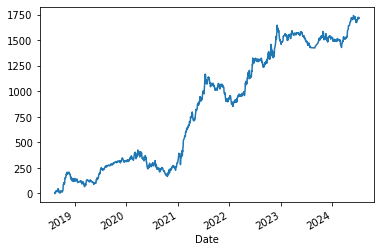

In [50]:
prices['pnl'].cumsum().plot()

#### Performance metrics

In [51]:
def backtest_price(price_series, position_series):
    bt = pd.DataFrame(price_series.diff() * position_series.shift())
    bt['date'] = [str(i)[:10] for i in bt.index]
    daily_pnl = bt.groupby('date').sum()
    sharpe = (daily_pnl.mean()/daily_pnl.std()*np.sqrt(252))[0]
    max_dd = (daily_pnl.cummax() - daily_pnl.cumsum()).max()/price_series.max()
    return sharpe, max_dd

In [52]:
sharpe, max_dd = backtest_price(prices['VN30F1M'], prices['Pos'])
print(f"Sharpe ratio: {sharpe}")
print(f"Max drawdown: {max_dd}")

Sharpe ratio: 1.3029956539795642
Max drawdown: 0    0.007659
dtype: float64
